<a href="https://colab.research.google.com/github/wongakim-99/Data-science-project/blob/main/project/mental_health_20s_selfHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd

mental_data = pd.read_csv('mental_health_data.csv', encoding = 'utf-8')
mental_data

,성별,나이,가구형태,주택 내 위치,청년 지원제도 잘 아는지,각종 지원제도 만족도,장애유무,건강상태,2년 내로 건강검진 받았는지,1년 내 자살생각 했는지 유무,지난 한달 동안 정신적 힘들었는지,1년 내로 정신과 상담 유무,1년 내로 정신과 약 처방유무
0,2,25,4,2,3,4,2,1,1,2,2,2,2
1,1,25,6,1,2,8,2,1,2,2,2,2,2
2,1,26,6,1,2,5,2,1,2,2,2,2,2
3,1,32,4,1,2,4,2,3,1,2,2,2,2
4,2,29,4,1,2,5,2,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2,28,4,1,2,6,2,2,2,2,2,2,2
757,2,24,4,1,2,6,2,2,2,2,2,2,2
758,2,24,6,1,2,5,2,2,1,2,2,2,2
759,2,34,6,1,1,,2,3,1,2,1,2,2


In [3]:
# 결측값 있는지 확인
mental_data.isnull().sum()

성별                    0
나이                    0
가구형태                  0
주택 내 위치               0
청년 지원제도 잘 아는지         0
각종 지원제도 만족도           0
장애유무                  0
건강상태                  0
2년 내로 건강검진 받았는지       0
1년 내 자살생각 했는지 유무      0
지난 한달 동안 정신적 힘들었는지    0
1년 내로 정신과 상담 유무       0
1년 내로 정신과 약 처방유무      0
dtype: int64

In [4]:
# 20대 청년 남성과 여성의 비율
# 1. 남성   2. 여성
mental_data.성별.value_counts()

성별
1    442
2    319
Name: count, dtype: int64

In [5]:
# 2년 내로 건강검진 받았는지 유무
# 1. 그렇다  2. 아니다
mental_data['2년 내로 건강검진 받았는지'].value_counts()

2년 내로 건강검진 받았는지
2    498
1    263
Name: count, dtype: int64

In [6]:
# 1년 내로 자살생각이 진지하게 있었는지?
# 1. 그렇다  2. 아니다
mental_data['1년 내 자살생각 했는지 유무'].value_counts()

1년 내 자살생각 했는지 유무
2    734
1     27
Name: count, dtype: int64

In [7]:
# 지난 한달 동안 정신적 힘들었는지
# 1. 그렇다  2. 아니다
mental_data['지난 한달 동안 정신적 힘들었는지'].value_counts()

지난 한달 동안 정신적 힘들었는지
2    690
1     71
Name: count, dtype: int64

In [8]:
# 1년 내로 정신과 상담 유무
# 1. 그렇다  2. 아니다
mental_data['1년 내로 정신과 상담 유무'].value_counts()

1년 내로 정신과 상담 유무
2    730
1     31
Name: count, dtype: int64

In [9]:
# 1년 내로 정신과 약 처방유무
# 1. 그렇다  2. 아니다
mental_data['1년 내로 정신과 약 처방유무'].value_counts()

1년 내로 정신과 약 처방유무
2    739
1     22
Name: count, dtype: int64

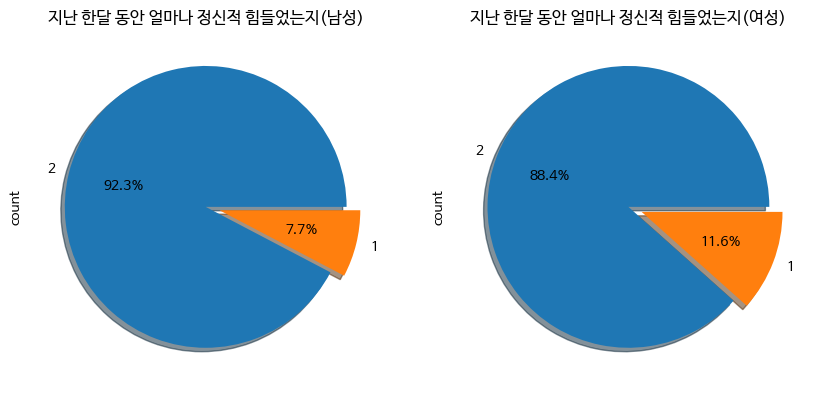

In [16]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

f, ax = plt.subplots(1, 2, figsize = (10, 5))
mental_data['지난 한달 동안 정신적 힘들었는지'][mental_data['성별'] == 1].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
mental_data['지난 한달 동안 정신적 힘들었는지'][mental_data['성별'] == 2].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = ax[1], shadow = True)
ax[0].set_title('지난 한달 동안 얼마나 정신적 힘들었는지(남성)')
ax[1].set_title('지난 한달 동안 얼마나 정신적 힘들었는지(여성)')
plt.show()

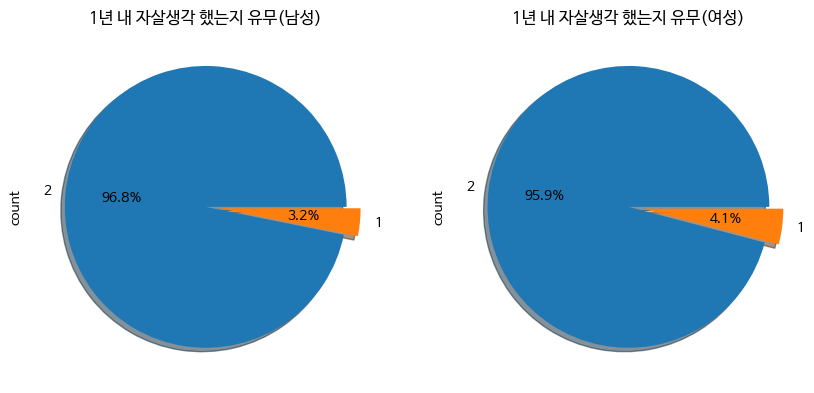

In [17]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
mental_data['1년 내 자살생각 했는지 유무'][mental_data['성별'] == 1].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
mental_data['1년 내 자살생각 했는지 유무'][mental_data['성별'] == 2].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = ax[1], shadow = True)
ax[0].set_title('1년 내 자살생각 했는지 유무(남성)')
ax[1].set_title('1년 내 자살생각 했는지 유무(여성)')
plt.show()

# 데이터 모델링

**20대 남성과 여성의 속성과 정신건강 사이에 어떤 상관관계가 있는지 분석하는 모델 만들기.**<br/>
**상관 분석은 pandas 패키지의 데이터프레임에서 corr()함수를 사용하고, 상관계수는 피어슨 계수를 사용한다.**<br/>
(※상관계수는 연속형 데이터에서만 구할 수 있으므로 데이터 형식이 int64, boolean인 속성에 대해서만 상관 분석을 진행한다.)


- **상관계수p**<br/>
  **상관계수p는 변수 간 관계의 정도(0~1)와 방향(+, -)을 하나의수치로 요약해주는 지수로 -1에서 +1 사이의 값을 가진다.**<br/>
  **상관 계수가 + 이면 양의 상관관계이며 한 변수가 증가하면 다른 변수도 증가한다. 상관 계수가 - 이면 음의 상관관계이며 한 변수가 증가할 때 다른 변수는 감소한다.**<br/>
  - 0.0 ~ 0.2 : 상관관계가 거의 없다.
  - 0.2 ~ 0.4 : 약한 상관관계가 있다.
  - 0.4 ~ 0.6 : 상관관계가 있다.
  - 0.6 ~ 0.8 : 강한 상관관계가 있다.
  - 0.8 ~ 1.0 : 매우 강한 상관관계가 있다.

In [12]:
# info를 통해 확인결과 '각종 지원제도 만족도' 열만 object형식이므로 이 열을 제외한 나머지 열에 대해서 상관분석 진행
mental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   성별                  761 non-null    int64 
 1   나이                  761 non-null    int64 
 2   가구형태                761 non-null    int64 
 3   주택 내 위치             761 non-null    int64 
 4   청년 지원제도 잘 아는지       761 non-null    int64 
 5   각종 지원제도 만족도         761 non-null    object
 6   장애유무                761 non-null    int64 
 7   건강상태                761 non-null    int64 
 8   2년 내로 건강검진 받았는지     761 non-null    int64 
 9   1년 내 자살생각 했는지 유무    761 non-null    int64 
 10  지난 한달 동안 정신적 힘들었는지  761 non-null    int64 
 11  1년 내로 정신과 상담 유무     761 non-null    int64 
 12  1년 내로 정신과 약 처방유무    761 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 77.4+ KB


In [13]:
numeric_columns = mental_data.select_dtypes(include=['int64'])  # 상관계수 분석을 위해 연속형 데이터인 int64 데이터를 가진 행만 선택
mental_corr = numeric_columns.corr(method = 'pearson')  # 피어슨 상관계수 사용
mental_corr

'''
아래의 결과를 통해서 확인 가능한 것

지난 한달간 정신적으로 얼마나 힘들었는지, 1년 내로 정신과 상담 유무, 1년 내로 정신과 약 처방유무와 1년 내 자살생각 했는지 유무의 결과가
양의 정수에 가까운 수치를 보였다.
'''

'\n아래의 결과를 통해서 확인 가능한 것\n\n지난 한달간 정신적으로 얼마나 힘들었는지, 1년 내로 정신과 상담 유무, 1년 내로 정신과 약 처방유무와 1년 내 자살생각 했는지 유무의 결과가 \n양의 정수에 가까운 수치를 보였다.\n'

In [14]:
# 특정 변수 사이의 상관 계수 구하기
# 이 데이터간의 상관관계가 상당히 높게 나왔다.
print(mental_data['1년 내 자살생각 했는지 유무'].corr(mental_data['1년 내로 정신과 상담 유무']))
print(mental_data['1년 내 자살생각 했는지 유무'].corr(mental_data['지난 한달 동안 정신적 힘들었는지']))
print(mental_data['1년 내 자살생각 했는지 유무'].corr(mental_data['1년 내로 정신과 약 처방유무']))

0.42762612016691487
0.500208468615949
0.43326003185468726


# 결과 시각화

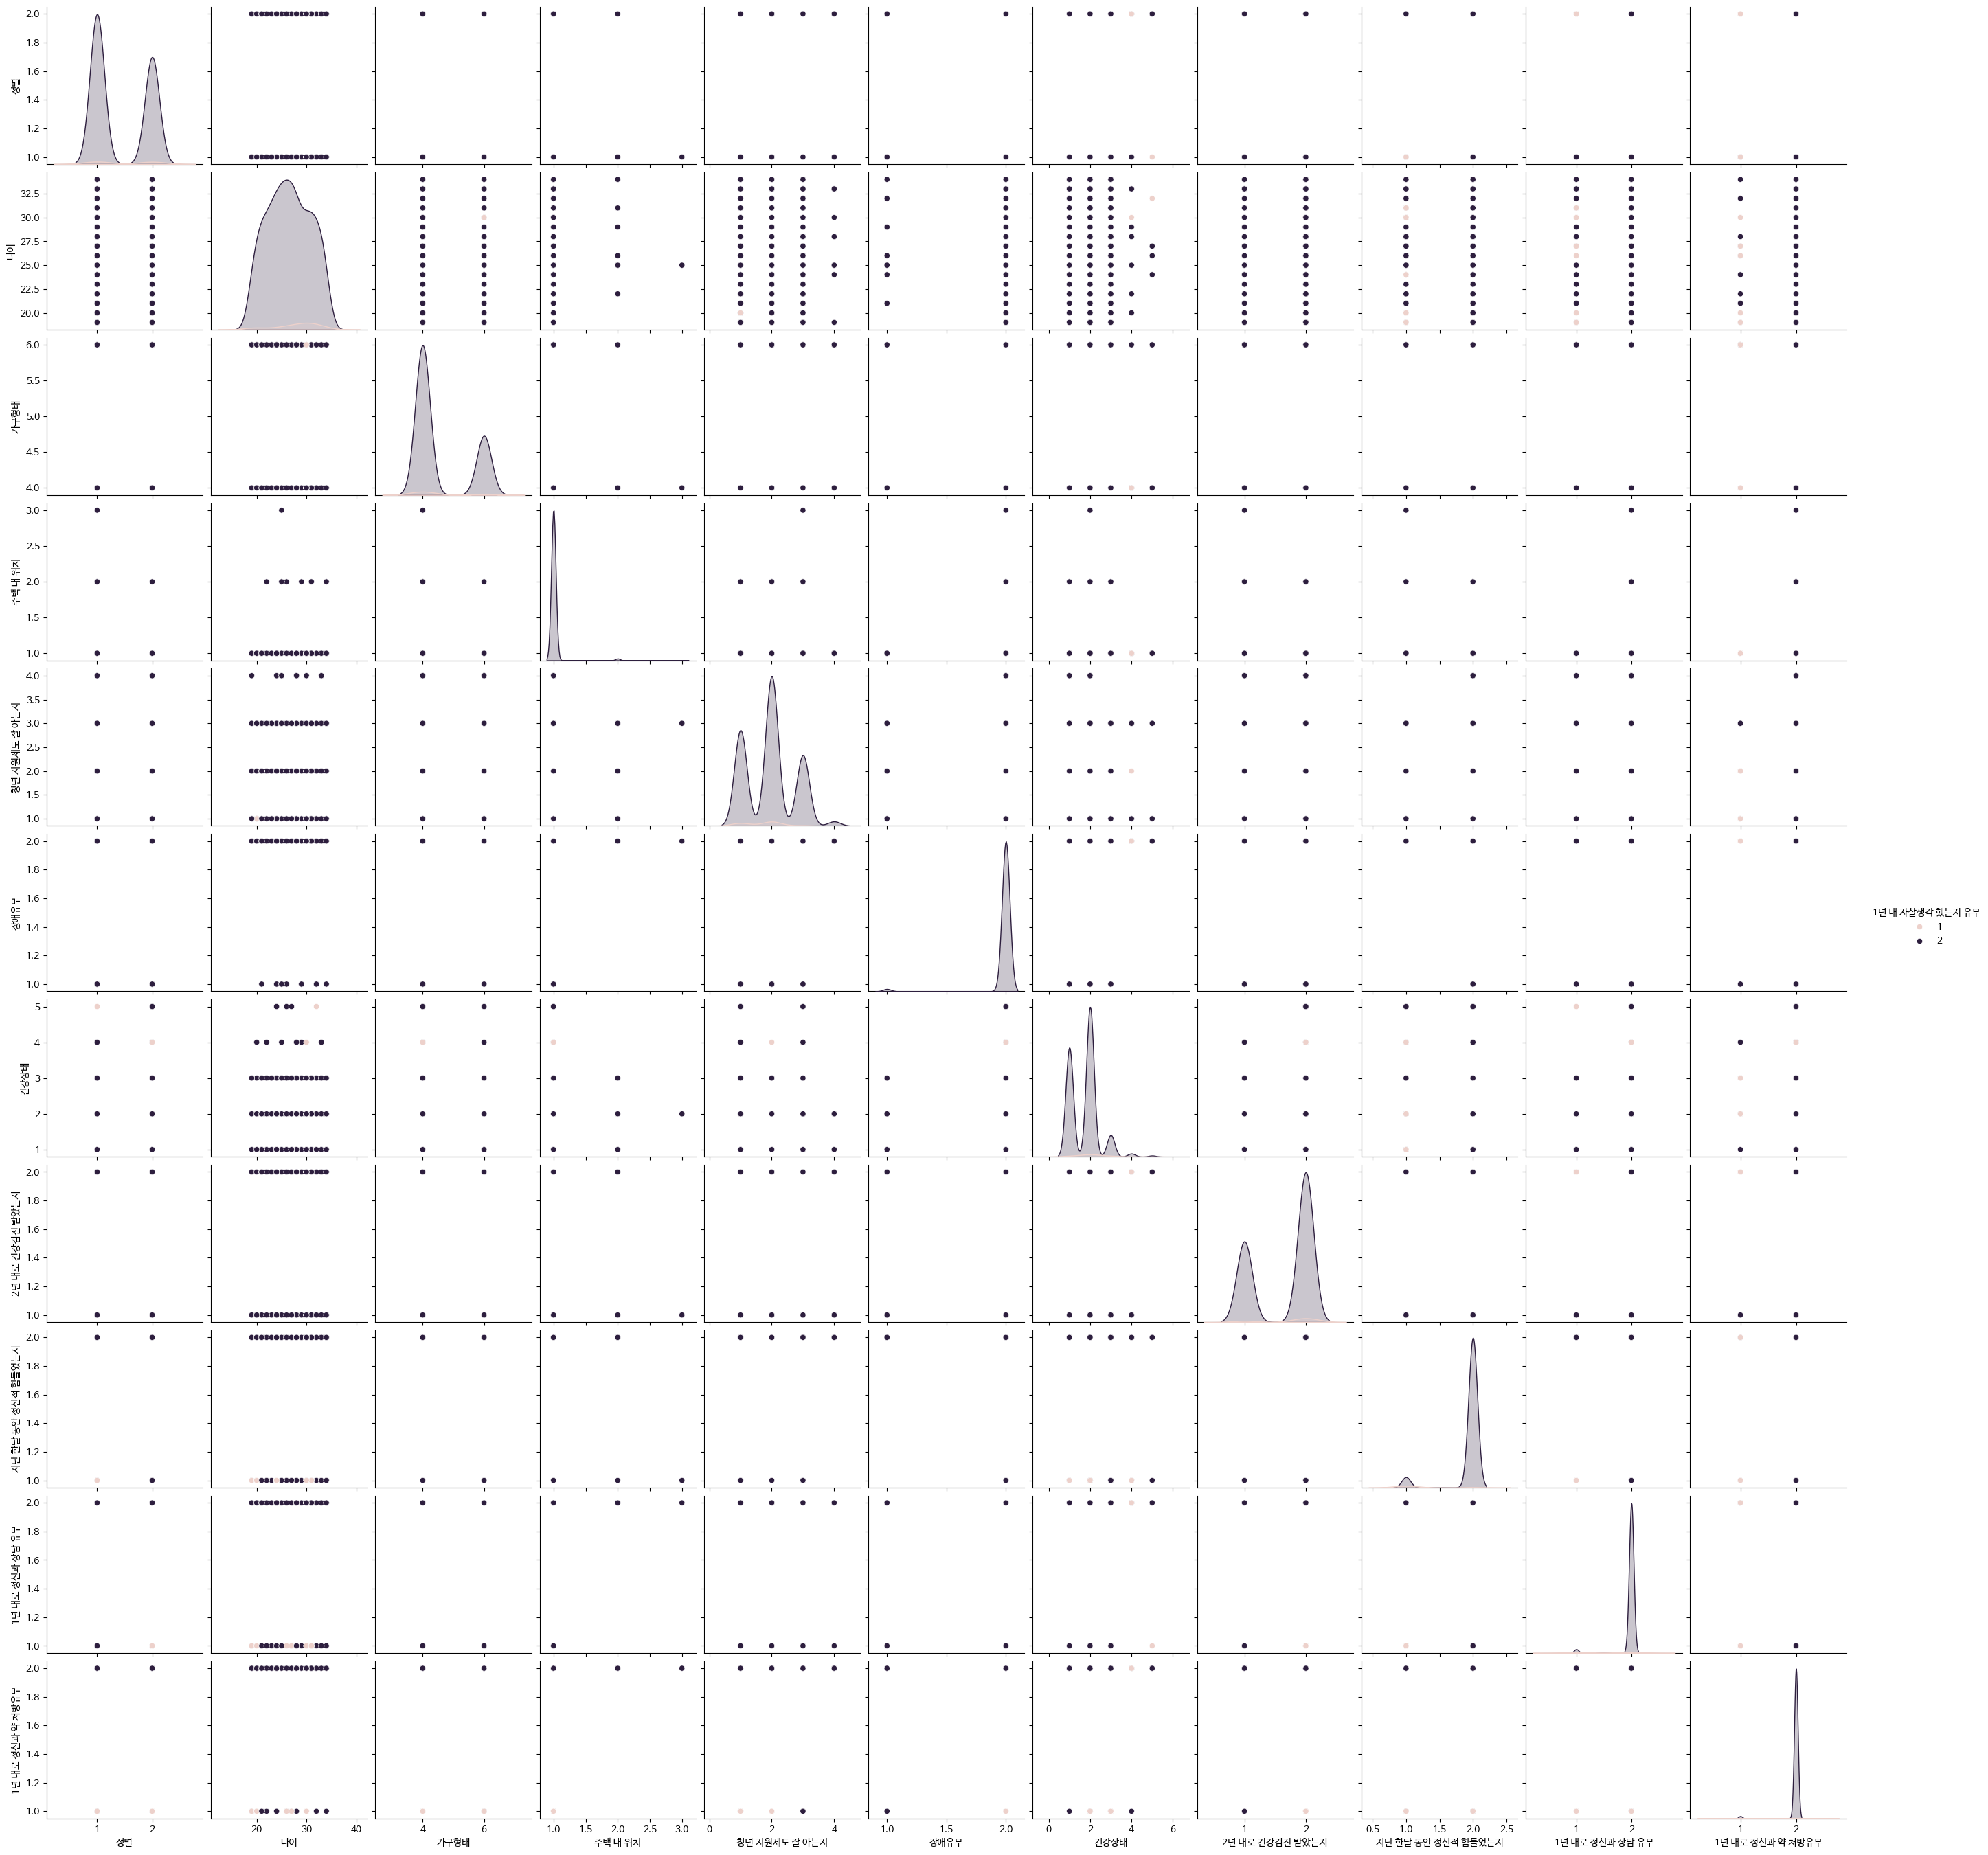

In [15]:
import seaborn as sns

sns.pairplot(mental_data, hue = '1년 내 자살생각 했는지 유무')
plt.show()

# 변수 사이의 상관 계수를 히트맵으로 시각화하기

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


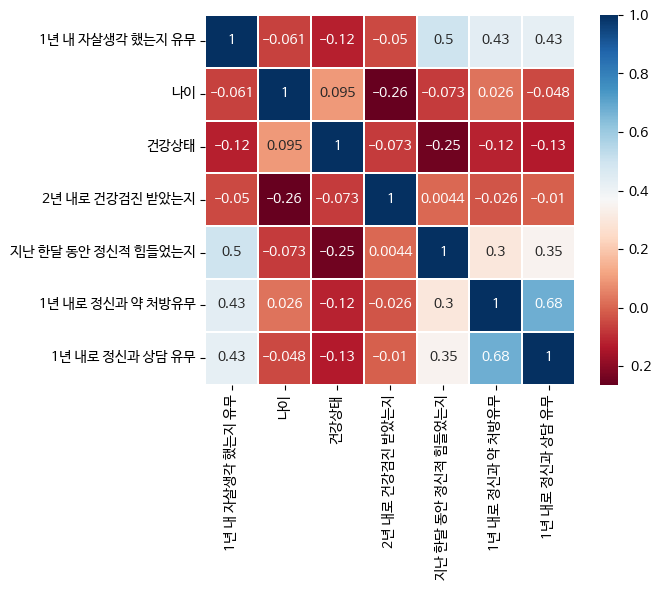

In [21]:
heatmap_data = mental_data[['1년 내 자살생각 했는지 유무', '나이', '건강상태', '2년 내로 건강검진 받았는지', '지난 한달 동안 정신적 힘들었는지','1년 내로 정신과 약 처방유무', '1년 내로 정신과 상담 유무']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size':10})
plt.show()